In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import models, layers, utils

In [ ]:
%cd /content/drive/MyDrive/youngseok

/content/drive/MyDrive/youngseok


# dealing data

In [ ]:
ratings = pd.read_csv('./rating_df.csv')

In [ ]:
ratings

,userID,classID,rating
0,0,34,0.08
1,0,14,1.28
2,0,10,4.25
3,0,32,1.47
4,0,18,2.76
...,...,...,...
777,99,33,3.67
778,99,49,0.88
779,99,32,3.12
780,99,46,4.00


In [ ]:
classes_df = pd.read_csv('./classes_df.csv')

In [ ]:
classes_df

,classID,교육,취미,건강,친목
0,0,0,1,0,0
1,1,0,1,0,0
2,2,0,0,1,0
3,3,1,0,0,0
4,4,0,0,0,1
5,5,1,0,0,0
6,6,0,0,1,0
7,7,0,0,1,0
8,8,0,0,1,0
9,9,0,0,1,0


In [ ]:
users_df = pd.read_csv('./user_df.csv')

In [ ]:
users_df

,userID,age,gender,physical_disable,mental_disable,Exercise,Arts&Crafts,Cooking,Technology,Culture,History,Language,Communication,Finance,Music
0,0,82,0,0,0,0,0,0,0,0,0,1,1,1,0
1,1,63,0,0,0,0,1,1,1,1,1,0,1,0,0
2,2,95,0,1,0,0,0,0,0,0,0,0,0,1,1
3,3,70,1,0,0,0,1,0,1,0,0,0,0,1,1
4,4,84,1,0,0,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,74,1,0,0,0,0,0,0,0,0,0,0,0,0
96,96,72,0,0,0,0,1,0,0,1,0,0,0,0,0
97,97,83,1,0,0,0,1,0,0,0,0,1,0,0,0
98,98,71,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
features = classes_df.drop(["classID"], axis=1).columns
print(features)
context = users_df.drop(["userID"], axis=1).columns
print(context)

Index(['교육', '취미', '건강', '친목'], dtype='object')
Index(['age', 'gender', 'physical_disable', 'mental_disable', 'Exercise',
       'Arts&Crafts', 'Cooking', 'Technology', 'Culture', 'History',
       'Language', 'Communication', 'Finance', 'Music'],
      dtype='object')


In [ ]:
train = ratings.copy()

In [ ]:
train = train.merge(classes_df[features], how="left", left_on="classID", right_index=True)
train = train.merge(users_df[context], how="left", left_on="userID", right_index=True)

In [ ]:
import pandas as pd
# csv_data = pd.read_csv('data.csv')

json_data = train.to_json(orient = 'records')

with open('json_data.json', 'w') as jsonfile:
    jsonfile.write(json_data)

In [ ]:
train

,userID,classID,rating,교육,취미,건강,친목,age,gender,physical_disable,...,Exercise,Arts&Crafts,Cooking,Technology,Culture,History,Language,Communication,Finance,Music
0,0,34,0.08,0,0,1,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,14,1.28,0,1,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,10,4.25,1,0,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,32,1.47,0,0,0,1,82,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,18,2.76,1,0,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,99,33,3.67,1,0,0,0,64,0,0,...,0,0,0,0,1,1,0,0,1,1
778,99,49,0.88,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1
779,99,32,3.12,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1
780,99,46,4.00,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1


# model constuct & train

In [ ]:
embeddings_size = 75
usr, prd = len(users_df), len(classes_df)
feat = len(features)
ctx = len(context)


xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)

cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)

cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])


nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)

nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)

nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=32, activation='relu')(nn_xx)


features_in = layers.Input(name="features_in", shape=(feat,))
features_x = layers.Dense(name="features_x", units=16, activation='relu')(features_in)


contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = layers.Dense(name="context_x", units=16, activation='relu')(contexts_in)


y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)


tf.keras.backend.clear_session()
tf.config.optimizer.set_jit(True) # Enable XLA.

model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

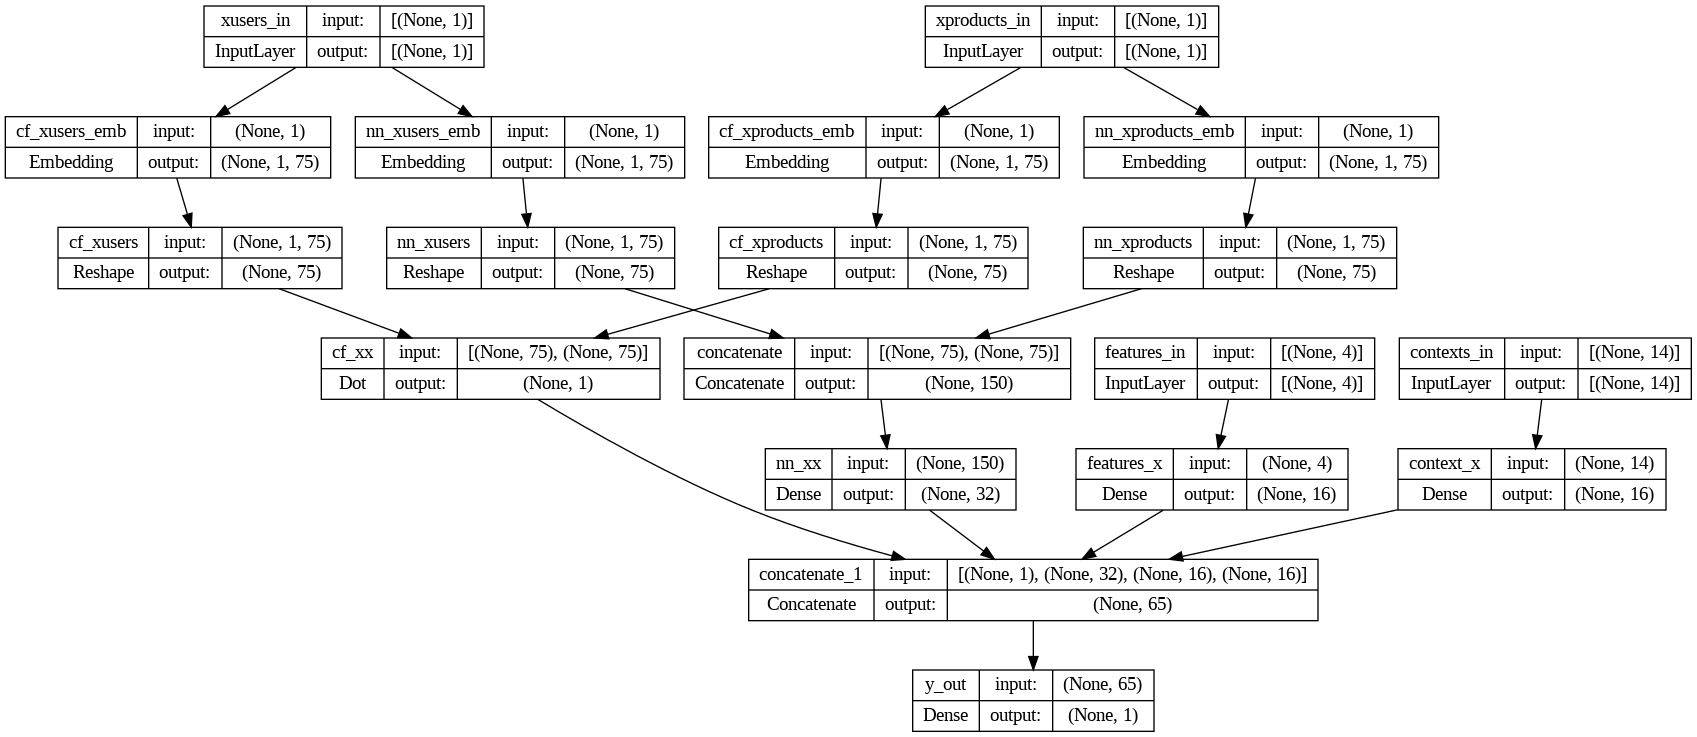

In [ ]:
tf.keras.utils.plot_model(model,  show_shapes=True)

In [ ]:
training = model.fit(x=[train["userID"], train["classID"], train[features], train[context]], y=train["rating"], 
                     epochs=1000, batch_size=128, shuffle=True, verbose=1, validation_split=0.3)
model = training.model 

Epoch 1/1000
5/5 [==============================] - 5s 130ms/step - loss: 4.5674 - mean_absolute_percentage_error: 346.1607 - val_loss: 4.0359 - val_mean_absolute_percentage_error: 250.1926
Epoch 2/1000
5/5 [==============================] - 0s 25ms/step - loss: 3.5464 - mean_absolute_percentage_error: 227.8528 - val_loss: 3.0436 - val_mean_absolute_percentage_error: 155.4491
Epoch 3/1000
5/5 [==============================] - 0s 18ms/step - loss: 2.5380 - mean_absolute_percentage_error: 117.2790 - val_loss: 2.0823 - val_mean_absolute_percentage_error: 83.0902
Epoch 4/1000
5/5 [==============================] - 0s 22ms/step - loss: 1.6370 - mean_absolute_percentage_error: 108.4625 - val_loss: 1.4149 - val_mean_absolute_percentage_error: 102.2733
Epoch 5/1000
5/5 [==============================] - 0s 18ms/step - loss: 1.1513 - mean_absolute_percentage_error: 158.8539 - val_loss: 1.1453 - val_mean_absolute_percentage_error: 142.6044
Epoch 6/1000
5/5 [==============================] - 0s 

In [ ]:
modelpath = "./models/recommender_base"
model.save(modelpath)

In [ ]:
!pip install tensorflow_model_optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 9.6 MB/s eta 0:00:00


# train model with QAT

In [ ]:
import tensorflow_model_optimization as tfmot

quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer

embeddings_size = 75
usr, prd = len(users_df), len(classes_df)
feat = len(features)
ctx = len(context)


xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)

cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)

cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])


nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)

nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)

nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = quantize_annotate_layer(layers.Dense(name="nn_xx", units=32, activation='relu'))(nn_xx)


features_in = layers.Input(name="features_in", shape=(feat,))
features_x = quantize_annotate_layer(layers.Dense(name="features_x", units=16, activation='relu'))(features_in)


contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
context_x = quantize_annotate_layer(layers.Dense(name="context_x", units=16, activation='relu'))(contexts_in)


y_out = layers.Concatenate()([cf_xx, nn_xx, features_x, context_x])
y_out = quantize_annotate_layer(layers.Dense(name="y_out", units=1, activation='linear'))(y_out)


tf.keras.backend.clear_session()
tf.config.optimizer.set_jit(True) # Enable XLA.

model = models.Model(inputs=[xusers_in,xproducts_in, features_in, contexts_in], outputs=y_out, name="Hybrid_Model")
model = tfmot.quantization.keras.quantize_apply(model)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "Hybrid_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 nn_xusers_emb (Embedding)      (None, 1, 75)        7500        ['xusers_in[0][0]']              
                                                                                                  
 nn_xproducts_emb (Embedding)   (None, 1, 75)        3750        ['xproducts_in[0][0]']           
                                                                                       

In [ ]:
training = model.fit(x=[train["userID"], train["classID"], train[features], train[context]], y=train["rating"], 
                     epochs=1000, batch_size=128, shuffle=True, verbose=1, validation_split=0.3)
model = training.model 

Epoch 1/1000
5/5 [==============================] - 3s 105ms/step - loss: 3.4119 - mean_absolute_percentage_error: 219.1329 - val_loss: 3.3442 - val_mean_absolute_percentage_error: 177.5694
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 3.0633 - mean_absolute_percentage_error: 179.0393 - val_loss: 3.0200 - val_mean_absolute_percentage_error: 143.3204
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 2.6986 - mean_absolute_percentage_error: 134.6919 - val_loss: 2.6287 - val_mean_absolute_percentage_error: 108.4012
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 2.2797 - mean_absolute_percentage_error: 97.5354 - val_loss: 2.2013 - val_mean_absolute_percentage_error: 96.0777
Epoch 5/1000
5/5 [==============================] - 0s 14ms/step - loss: 1.8139 - mean_absolute_percentage_error: 95.5701 - val_loss: 1.8336 - val_mean_absolute_percentage_error: 105.4406
Epoch 6/1000
5/5 [==============================] - 0s 18

# convert to tflite file

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

/usr/local/lib/python3.9/dist-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
with open('recommender.tflite', 'wb') as f:
  f.write(quantized_tflite_model)

# tflite file running test

In [ ]:
interpreter = tf.lite.Interpreter(model_path="models/quantized_tflite_model.tflite")
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'name': 'serving_default_features_in:0',
  'index': 0,
  'shape': array([1, 4], dtype=int32),
  'shape_signature': array([-1,  4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'serving_default_xusers_in:0',
  'index': 1,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'serving_default_xproducts_in:0',
  'index': 2,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float3

In [ ]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 60,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
train

,userID,classID,rating,교육,취미,건강,친목,age,gender,physical_disable,...,Exercise,Arts&Crafts,Cooking,Technology,Culture,History,Language,Communication,Finance,Music
0,0,34,0.08,0,0,1,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,14,1.28,0,1,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
2,0,10,4.25,1,0,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,32,1.47,0,0,0,1,82,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,18,2.76,1,0,0,0,82,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,99,33,3.67,1,0,0,0,64,0,0,...,0,0,0,0,1,1,0,0,1,1
778,99,49,0.88,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1
779,99,32,3.12,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1
780,99,46,4.00,0,0,0,1,64,0,0,...,0,0,0,0,1,1,0,0,1,1


In [ ]:
train = pd.read_json('./json_data.json')

In [ ]:
output_data = list()
for feature, user_id, class_id, contex in zip(train[features].astype(np.float32).to_numpy(), train["userID"].astype(np.float32).to_numpy(), train["classID"].astype(np.float32).to_numpy(), train[context].astype(np.float32).to_numpy()):
    interpreter.set_tensor(input_details[0]['index'], feature.reshape(1, -1))
    interpreter.set_tensor(input_details[1]['index'], user_id.reshape(1, -1))
    interpreter.set_tensor(input_details[2]['index'], class_id.reshape(1, -1))
    interpreter.set_tensor(input_details[3]['index'], contex.reshape(1, -1))

    interpreter.invoke()

    output_data.append(interpreter.get_tensor(output_details[0]['index']))

print(output_data)

[array([[-0.14515588]], dtype=float32), array([[1.2856662]], dtype=float32), array([[4.168047]], dtype=float32), array([[1.4100856]], dtype=float32), array([[2.7579615]], dtype=float32), array([[1.9284995]], dtype=float32), array([[1.3271394]], dtype=float32), array([[5.0389824]], dtype=float32), array([[0.74651587]], dtype=float32), array([[2.7994347]], dtype=float32), array([[1.3064028]], dtype=float32), array([[4.3546762]], dtype=float32), array([[0.55988693]], dtype=float32), array([[3.6288967]], dtype=float32), array([[1.2234566]], dtype=float32), array([[0.72577935]], dtype=float32), array([[4.7694073]], dtype=float32), array([[1.9284995]], dtype=float32), array([[0.3939945]], dtype=float32), array([[2.2810209]], dtype=float32), array([[0.51841384]], dtype=float32), array([[2.5091228]], dtype=float32), array([[2.778698]], dtype=float32), array([[2.5713325]], dtype=float32), array([[2.6750152]], dtype=float32), array([[1.389349]], dtype=float32), array([[3.1934292]], dtype=float32